# Plots of lichen data and the ELF isolated from them
This Notebook plots descriptive data about the New Zealand lichen collection at Victoria University of Wellington and the taxonomy of endolichenic fungi (ELF) isolates that were recovered from a subset of these lichens.

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import plotly.graph_objects as go

The bulk of the data is stored in `ELF_master_results.csv`, a table with all sorts of different data in wide format for each ELF that was isolated. Included are assembly metrics, gene content, BGC content, taxonomic information, as well as information about the lichen it was isolated from.

First, a taxonomic subset of this dataset is prepared below and data points with no information on the lichen 'Host_Genus' removed.

In [2]:
df = pd.read_csv("../ELF_master_results.csv")
df2 = df[["isolate_genus", "isolate_class", "Host_Genus", "Host_ID"]]
df2 = df2.fillna("unidentified")
df2 = df2[df2["Host_Genus"] != 0]
df2.head()

,isolate_genus,isolate_class,Host_Genus,Host_ID
0,Trichoderma,Sordariomycetes,Pseudocyphellaria,222
1,Mucor,Mucoromycetes,Pseudocyphellaria,222
2,Mucor,Mucoromycetes,Pseudocyphellaria,222
3,unidentified,unidentified,Pseudocyphellaria,222
4,Mucor,Mucoromycetes,Pseudocyphellaria,222


### Fig. 3.2 - Geographical map of lichen collection locations

Next let's plot the locations of all collected lichens from `lichen_collection_locations.csv`. This file contains a centralised coordinate for each sample and the macroclimate at that site. I merged some locations from the dataset into wider locations, such as specific streets or closely located sites, for privacy reasons as well as communication reasons

We will use the MatPlotLib submodule Basemap to prepare an axes with a map of New Zealand/Aotearoa. Then we will overlay a scatterplot containing all the location points, as determined from the latitude/longitude in the input file. The scatterplot markers are sized to the number of samples collected from each site and are coloured for the macroclimate `lichen_collection_locations.csv`.

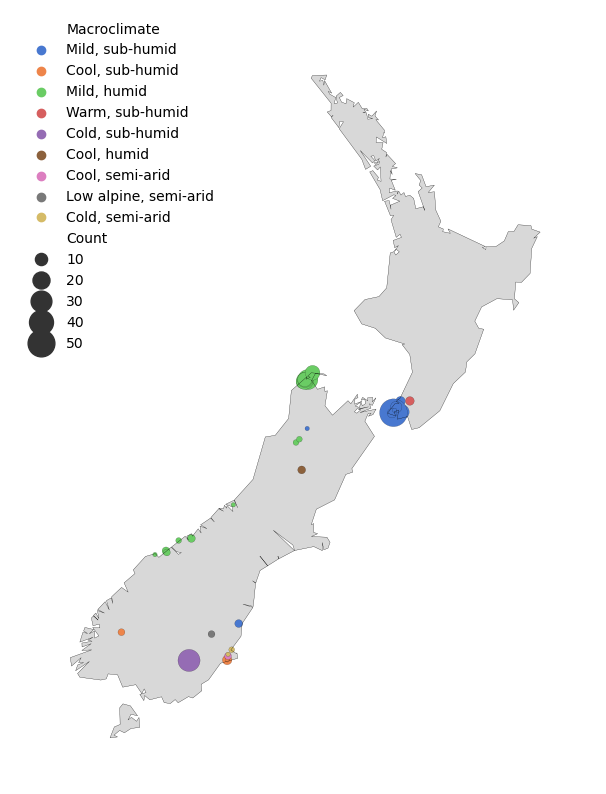

In [3]:
map_df = pd.read_csv("lichen_collection_locations.csv")

# Set the dimension of the figure
plt.rcParams["figure.figsize"]=15,10;

# Make the background map
m=Basemap(llcrnrlon=165, llcrnrlat=-48, urcrnrlon=180, urcrnrlat=-33, projection='merc', resolution="l"); # the actual figure in the thesis was prepared using the high-resolution map dataset, using `resolution="f"`.
m.drawmapboundary(fill_color='#FFFFFF', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.2, color="black");

xpt,ypt = m(170.477721,-45.901944) # order of lat,long important
#m.plot(xpt,ypt,'bo') 
# transforms long, lat data to fit map projection
map_df["long"], map_df["lat"] = m(map_df["Longitude"], map_df["Latitude"])
map_df["size"] = map_df["Count"]*100
# Add a point per position
ax = sns.scatterplot(data=map_df,
    x="long", 
    y="lat", 
    size='Count',
    sizes=(10,400),
    palette="muted",
    hue='Macroclimate',
    edgecolor='black',
    linewidth=0.1
)

plt.legend(frameon=False)
legend = plt.legend()
legend.get_frame().set_linewidth(0.0)
frame = legend.get_frame()
frame.set_facecolor('#FFFFFF')

plt.savefig("lichen_collection_map.svg")

## Fig. 3.3 - Sankey plot of collected lichen sample taxonomy
The Sankey plot generated below was manually coloured using an SVG editor, using relationships defined by [NCBI Taxonomy](https://www.ncbi.nlm.nih.gov/taxonomy/).

To prepare a Sankey diagram with plotly.go, you need to have three sorted lists where each index is a specific link:
1. a source list - the start node of each link
2. a target list - the end node of each link
3. a value list - the size of each link

The links in the resulting plot can be moved to better display them before being exported as an SVG and each taxonomic level coloured manually.

In [4]:
plt.rcdefaults()
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Lecanoromycetes\n241", \
               "Peltigerales\n107", "Lecanorales\n120", "Teloschistales\n10", "Pertusariales\n1", "Trichotheliales\n1", "Gyalectales\n2", \
               "Lobariaceae\n88", "Collemataceae\n22", "Parmeliaceae\n44", "Teloschistaceae\n10", "Physciaceae\n3", "Stereocaulaceae\n16", "Cladoniaceae\n17", "Ramalinaceae\n5", "Peltigeraceae\n17", "Sphaerophoraceae\n6", "Coccotremataceae\n1", "Icmadophilaceae\n2", "Pannariaceae\n4", "Trichotheliaceae\n1", "Parmeliaceae\n1", "Gyalectaceae\n2", "Nephromataceae\n2", \
              "Yarrumia\n8", "Collema\n7", "Leptogium\n5", "Pseudocyphellaria\n58", "Parmotrema\n18", "Xanthoria\n6", "Physcia\n2", "Stereocaulon\n16", "Cladonia\n13", "Ramalina\n5", "Usnea\n12", "Heterodermia\n1", "Teloschistes\n4", "Hypogymnia\n1", "Peltigera\n17", "Sticta\n14", "Flavoparmelia\n2", "Lobaria\n3", "Cladia\n3", "Podostictina\n4", "Bunodophoron\n4", "Coccotrema\n1", "Siphula\n2", "Leifidium\n1", "Neophyllis\n1", "Pannaria/Psoroma\n1", "Collema/Leptogium\n10", "Porina\n1", "Crocodia\n2", "Menegazzia\n3", "Pannaria\n3", "Cetraria\n1", "Xanthoparmelia\n6", "Sphaerophorus\n1", "Notoparmelia\n2", "Punctelia\n1", "Coenogonium\n2", "Nephroma\n2", \
              "unidentified\n156", "unidentified\n156", "lichens\n399"],
      color = "black"),
    link = dict(
      source = [64, 64, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 11, 11, 12, 13, 13, 13, 14, 15, 16, 16, 16, 17, 18, 19, 19, 20, 21, 22, 23],
      target = [0, 62, 1, 2, 3, 4, 5, 6, 7, 15, 23, 8, 9, 11, 12, 13, 14, 16, 18, 19, 21, 10, 17, 20, 22, 24, 27, 39, 41, 43, 52, 25, 26, 50, 28, 34, 37, 40, 53, 55, 56, 58, 59, 29, 30, 35, 31, 32, 42, 48, 33, 38, 44, 47, 57, 45, 46, 49, 54, 51, 37, 60, 61],
      value = [241, 158, 107,120,10,1,1,2,88,17,2,22,44,3,16,17,5,6,2,4,1,10,1,1,2,8,57,14,3,4,2,7,5,10,17,12,1,2,3,1,6,2,1,6,2,1,16,13,3,1,5,17,4,1,1,1,2,1,3,1,1,2,2, 158])
    )])

fig.update_layout(title_text="Sampled lichen taxonomy", font_size=10)
fig.show()
fig.write_image("lichen_taxonomy_sankey.svg")

## Fig. 3.4 - Plots of lichen descriptive data

Next I would like to compare the diversity of the lichen collection, based on their morphological, site, and taxonomic features. Data is parsed from `lichen_dataset.csv`.

It was not the primary goal of my work to identify these lichens, which was fortunate as I did not want to go through each frozen lichen sample and determine the growth, putative photobiont(s), and putative species. Therefore, I have excluded samples with no recorded information for these details. As such, I did not work with any lichen samples lacking these details.

Let's see how many lichens remain after this cleanup.

In [5]:
lichen_df = pd.read_csv("lichen_dataset.csv")
lichen_df2 = lichen_df.dropna(subset=['Growth'])
lichen_df2['Photobiont'] = lichen_df2['Photobiont'].replace('Tri', 'Tripartite')
print(f"Number of total lichens: {len(lichen_df)}\nNumber of investigated lichens: {len(lichen_df2)}")
display(lichen_df2)

Number of total lichens: 399
Number of investigated lichens: 246


C:\Users\styleske\AppData\Local\Temp\ipykernel_1452\3819098105.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lichen,Collection location,Class,Order,Family,Genus,Species,Photobiont,Growth,Macroclimate
13,23,Wellington,Lecanoromycetes,Peltigerales,Lobariaceae,Yarrumia,colensoi,Green,Foliose,"Mild, sub-humid"
25,102,Wellington,Lecanoromycetes,Lecanorales,Collemataceae,Collema,sp.,Cyano,Foliose,"Mild, sub-humid"
29,106,Wellington,Lecanoromycetes,Lecanorales,Collemataceae,Leptogium,coralloideum,Cyano,Foliose,"Mild, sub-humid"
32,109,Wellington,Lecanoromycetes,Lecanorales,Collemataceae,Leptogium,coralloideum,Cyano,Foliose,"Mild, sub-humid"
33,110,Wellington,Lecanoromycetes,Lecanorales,Collemataceae,Collema,sp.,Cyano,Foliose,"Mild, sub-humid"
...,...,...,...,...,...,...,...,...,...,...
394,472,Wainuiomata water reserve,Lecanoromycetes,Lecanorales,Stereocaulaceae,Stereocaulon,ramulosum,Tripartite,Fruticose,"Mild, sub-humid"
395,473,Wainuiomata water reserve,Lecanoromycetes,Peltigerales,Peltigeraceae,Peltigera,polydactylon,Cyano,Foliose,"Mild, sub-humid"
396,474,Wainuiomata water reserve,Lecanoromycetes,Peltigerales,Lobariaceae,Pseudocyphellaria,dissimilis,Cyano,Foliose,"Mild, sub-humid"
397,475,Wainuiomata water reserve,Lecanoromycetes,Peltigerales,Lobariaceae,Pseudocyphellaria,dissimilis,Cyano,Foliose,"Mild, sub-humid"


246 lichens passed the filter. These were then plotted into several bar graphs based on their photobiont, growth form, and macroclimate.

To see the distribution of this data I have prepared a heatmap of all the observed combinations of 'Growth', 'Photobiont', and 'Macroclimate' and compared them for each lichen mycobiont Order.

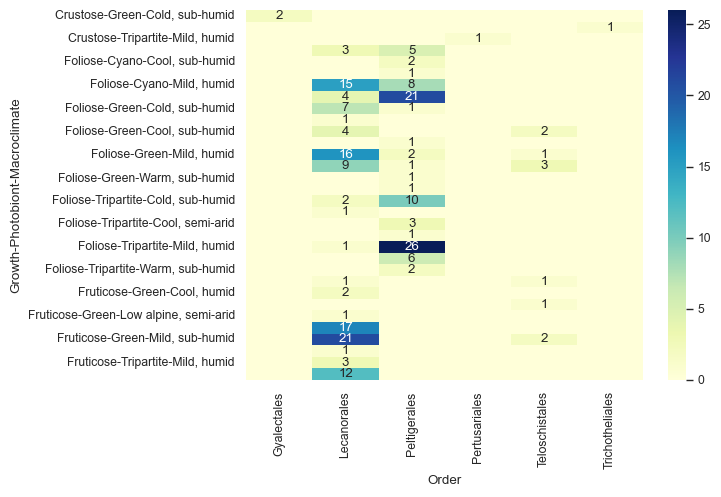

In [6]:
sns.set_style("white")
sns.set_context("paper")

# Prepare aggregated data for categorical variables and transpose it
pivot_df = lichen_df.pivot_table(index='Order', columns=['Growth', 'Photobiont', 'Macroclimate'], aggfunc='size', fill_value=0).T

# Plot the heatmap
sns.heatmap(data=pivot_df, cmap='YlGnBu', annot=True, fmt='g')

# Get the current axes object
ax = plt.gca()

# Iterate through each cell in the heatmap and remove the text if the value is 0
for text in ax.texts:
    if text.get_text() == '0':
        text.set_text('')

plt.show()

An alternative (perhaps easier to understand) plot is below, prepared from a barplot for each of the aformentioned categorical aspects.

WSH = warm, sub-humid; MH = mild, humid; MSH = mild, sub-humid; CH = cool, humid; CSH = cold, sub-humid; CSA = cool, semi-arid; CdH = cold, humid; CdSH = cold, sub-humid; CdSA = cold, semi-arid; LASA = low-alpine, semi-arid.

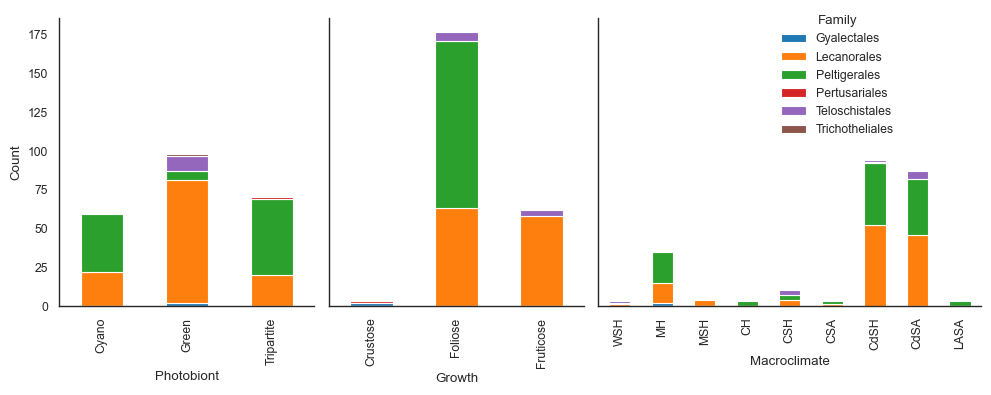

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True, gridspec_kw={'width_ratios': [1, 1, 1.5]})

# ax1
ax1_plot = lichen_df2.groupby(['Photobiont', 'Order']).size().reset_index().pivot(columns='Order', index='Photobiont', values=0)
ax1 = ax1_plot.plot(kind='bar', stacked=True, ax=axes[0])
ax1.legend(loc="center right", bbox_to_anchor=(0.8, 0.8), title="Family", frameon=False)
# Remove the spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Set x-axis labels
ax1.set_ylabel('Count')
ax1.set_xlabel('Photobiont')
ax1.legend_.remove()

# ax2
ax2_plot = lichen_df2.groupby(['Growth', 'Order']).size().reset_index().pivot(columns='Order', index='Growth', values=0)
ax2 = ax2_plot.plot(kind='bar', stacked=True, ax=axes[1])
ax2.legend(loc="center right", bbox_to_anchor=(0.8, 0.8), title="Family", frameon=False)
# Remove the spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# Set x-axis labels
ax2.set_ylabel('')
ax2.set_xlabel('Growth')
ax2.legend_.remove()

# ax3
ax3_plot = lichen_df2.groupby(['Macroclimate', 'Order']).size().reset_index().pivot(columns='Order', index='Macroclimate', values=0)
climate_order = ["Warm, sub-humid", "Mild, humid", "Mild, sub-humid", "Cool, humid", "Cool, sub-humid", "Cool, semi-arid", "Cold, sub-humid", "Cold, semi-arid", "Low alpine, semi-arid"]
ax3 = ax3_plot.plot(kind='bar', stacked=True, ax=axes[2])
ax3.legend(loc="center right", bbox_to_anchor=(0.8, 0.8), title="Family", frameon=False)
# Remove the spines
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
# Set x-axis labels
ax3.set_xticklabels(labels=['WSH', 'MH', 'MSH', 'CH', 'CSH', 'CSA', 'CdSH', 'CdSA', 'LASA'])
# Set axis labels
ax3.set_ylabel('')
ax3.set_xlabel('Macroclimate')

# Adjust the layout
fig.tight_layout()

# Save the plot in SVG and PNG formats
plt.savefig("lichen_characteristics.svg", format="svg", bbox_inches='tight')
plt.savefig("lichen_characteristics.png", format="png", bbox_inches='tight')

# Show the plot
plt.show()

## Fig. 3.9 - Plot of ELF by class
Similar to above, we prepare a barplot of the number of ELF, but by fungal Class, rather than genus. Data is read in from 

The below plot was altered in an SVG editor by combining with the Common Tree for the Classes as defined at https://www.ncbi.nlm.nih.gov/guide/howto/gen-com-tree/.  

In [8]:
classes = pd.DataFrame()
classes["count"] = df["isolate_class"].value_counts()
#df = pd.read_csv("fungal_class_counts.csv")
#df
classes

,count
Sordariomycetes,176
unidentified,45
Eurotiomycetes,39
Dothideomycetes,32
Mucoromycetes,15
Pezizomycetes,14
Agaricomycetes,6
Umbelopsidomycetes,4
Leotiomycetes,4
Tremellomycetes,2


['tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:red']


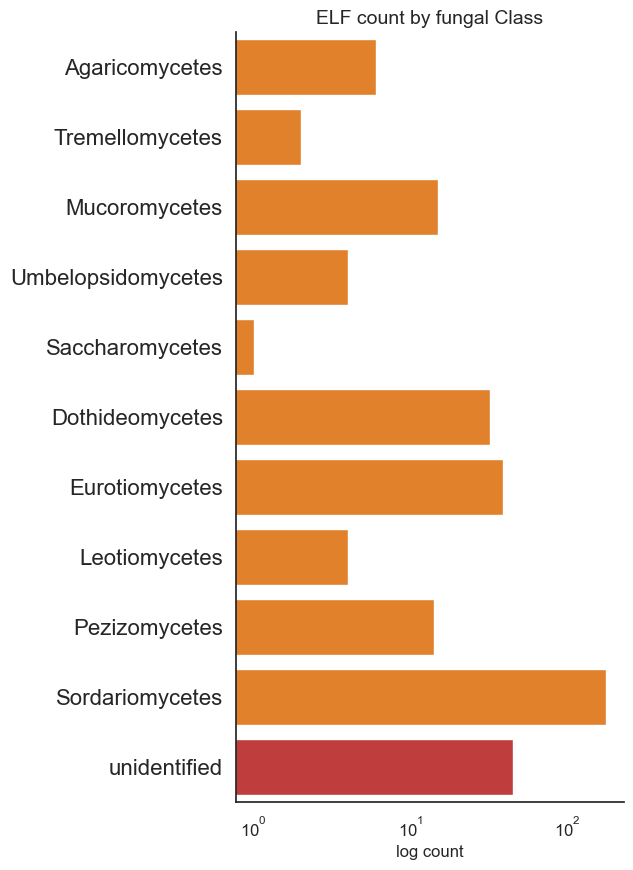

In [9]:
sns.set(rc={'figure.figsize':(5,10)})
sns.set_theme("notebook")
sns.set_style("white")
class_order = ["Agaricomycetes", "Tremellomycetes", "Mucoromycetes", "Umbelopsidomycetes", "Saccharomycetes", \
              "Dothideomycetes", "Eurotiomycetes", "Leotiomycetes", "Pezizomycetes", "Sordariomycetes", "unidentified"]
colours = ['tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:red']
print(colours)
ax = sns.barplot(data=classes, x="count", y=classes.index, order=class_order, palette=colours)
plt.xscale('log')
sns.despine(right=True)
ax.set(xlabel='log count', ylabel='')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=12)
ax.set_title('ELF count by fungal Class', fontsize=14)
plt.savefig("ELF_count_fungal_Class.svg", format="svg")
plt.show()

## Fig. 3.10 - Multiplot of lichens and isolated endolichenic fungi frequency

An occurence table is then prepared. This is a table that describes the count of ELF isolates for each ELF genera for each lichen host genera. This is then saved to a file 'lichen_isolates.csv'.

In [10]:
dfa = df2.groupby(['isolate_genus','Host_Genus']).size().reset_index()
dfb = dfa.pivot(index='isolate_genus', columns='Host_Genus', values=0).fillna(0)
dfb.to_csv('lichen_contingency.csv')
display(dfb)

Host_Genus,Bunodophoron,Cladia,Cladonia,Coccotrema,Coenogonium,Crocodia,Leptogium,Menegazzia,Nephroma,Parmotrema,...,Ramalina,Siphula,Sphaerophorus,Stereocaulon,Sticta,Teloschistes,Usnea,Xanthoparmelia,Yarrumia,unidentified
isolate_genus,,,,,,,,,,,,,,,,,,,,,
Absidia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amphirosellinia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0
Anthostomelloides,0.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
Antrelloides,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ascochyta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trichonectria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Umbelopsis,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xylaria,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Then sort the lichen genera columnns by the number of ELF isolated from each.

In [11]:
dfb = dfb.fillna(0)
dfb.loc['Column_Total']= dfb.sum(numeric_only=True, axis=0)
dfb = dfb.T
dfb = dfb.sort_values(by="Column_Total",ascending=False)
dfb = dfb.T.drop("Column_Total")
display(dfb)
df5 = dfb.T
df5.to_csv("lichen_isolates.csv")

Host_Genus,Pseudocyphellaria,Parmotrema,Stereocaulon,Yarrumia,Peltigera,Usnea,Leptogium,Teloschistes,Podostictina,Coccotrema,...,Siphula,Bunodophoron,Menegazzia,Coenogonium,Xanthoparmelia,unidentified,Nephroma,Sphaerophorus,Ramalina,Cladonia
isolate_genus,,,,,,,,,,,,,,,,,,,,,
Absidia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amphirosellinia,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Anthostomelloides,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
Antrelloides,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ascochyta,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trichonectria,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Umbelopsis,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xylaria,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here we prepare a colour map for a heatmap, based on the number of ELF genera.

In [12]:
prevalent_cols = dfb.sum().index
color_map = dict(zip(prevalent_cols, sns.color_palette()[:len(prevalent_cols)]))
column_sum=dfb.sum(axis=0).reset_index().sort_values(by=[0],ascending=False)

The following plot displays information about the relationship between ELF genera occurence and the lichen genera they were isolated from. It is a multiplot prepared from two bar plots and a heat matrix. 

It was edited using an SVG editor to align the top barplot with the rows of the heat matrix. The top-left empty subplot is also removed.

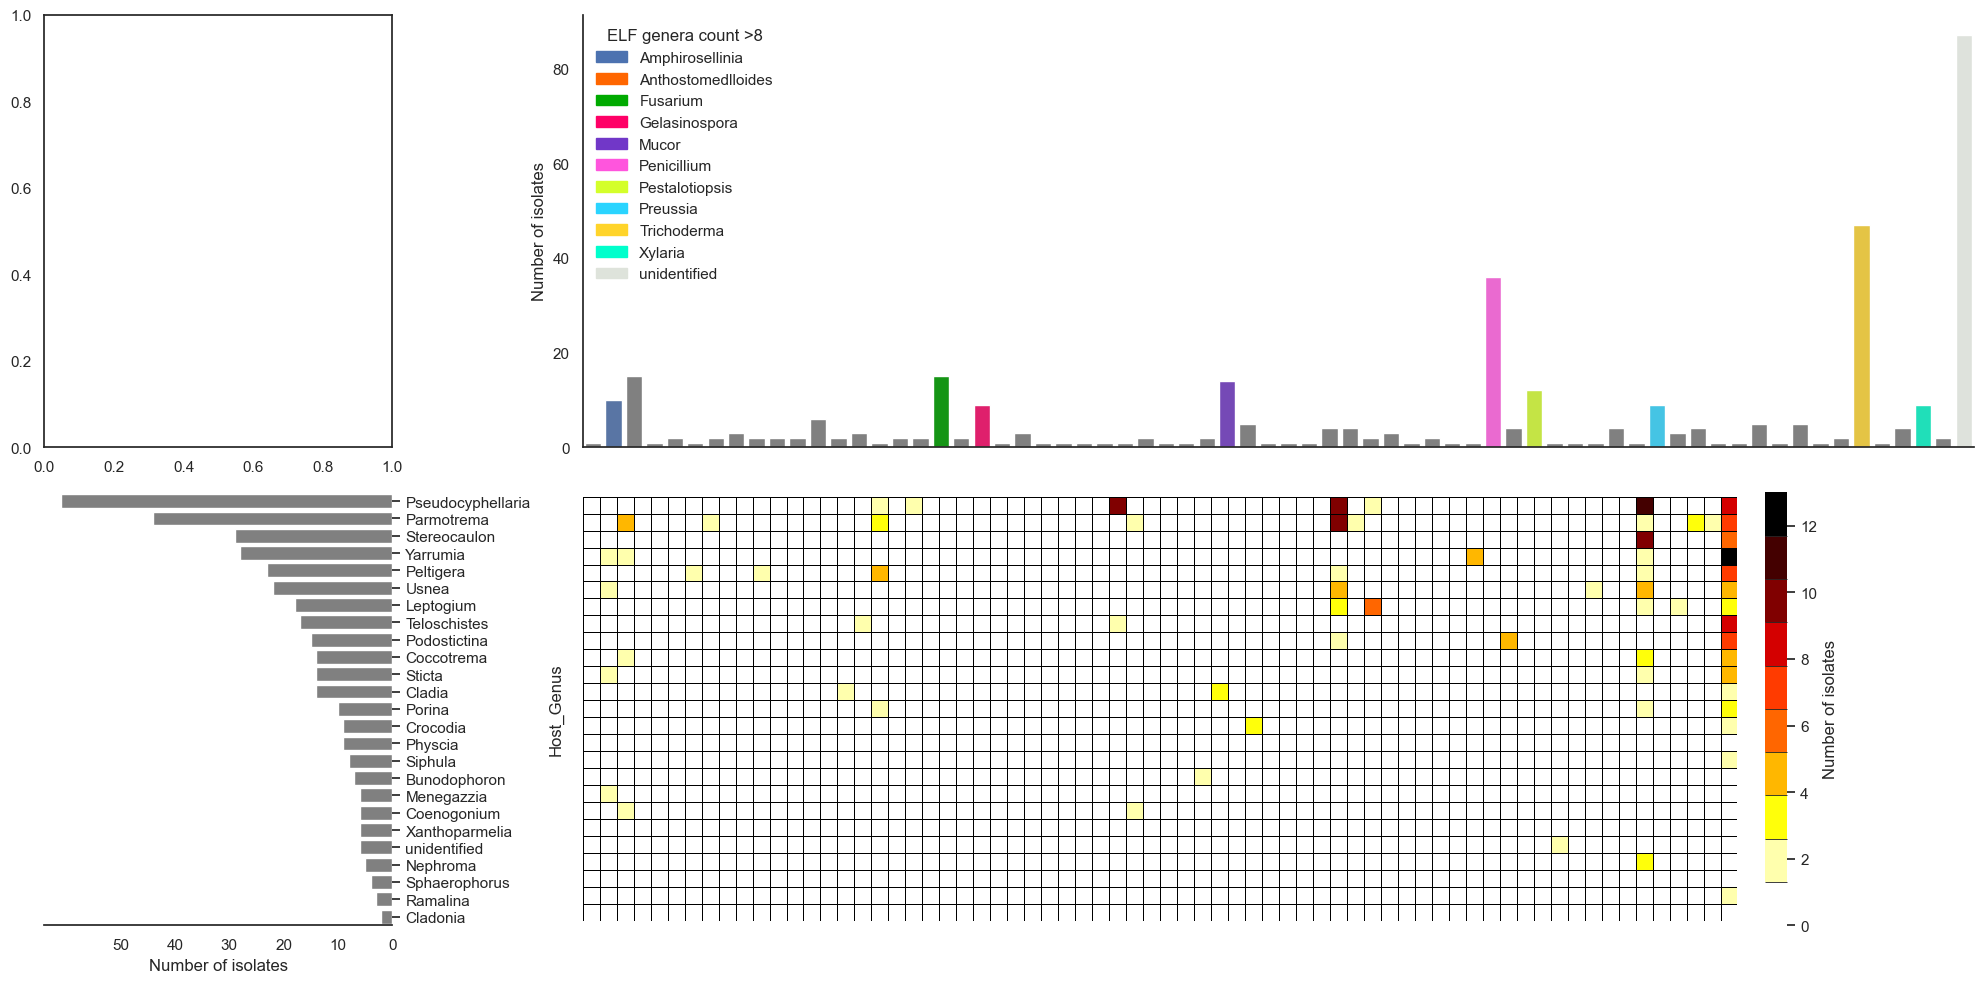

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [.2, .8]})

sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme("notebook")
sns.set_style("white")

ax1 = sns.barplot(data=column_sum, y=column_sum["Host_Genus"], x=column_sum[0],color='grey', ax=axes[1,0])
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.set_xlabel('Number of isolates',fontsize=12)
ax1.set(ylabel=None)
sns.despine(left=True, ax=ax1)
ax1.set(xticks=[0,10,20,30,40,50])

colors1 = {'Amphirosellinia':'#4c72b0ff', 'Anthostomedlloides':'#ff6600ff', 'Fusarium':'#00aa00ff', 'Gelasinospora':'#ff0066ff', 'Mucor':'#7137c8ff', 'Penicillium':'#ff55ddff', 'Pestalotiopsis':'#d4ff2aff', 'Preussia':'#2ad4ffff', 'Trichoderma':'#ffd42aff', 'Xylaria':'#00ffccff', 'unidentified': '#dee3dbff'}         
colors2 = colors1.copy()
for i in dfb.index:
    if i not in colors2:
        colors2[i] = "grey"
labels = list(colors1.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors1[label]) for label in labels]
ax2 = sns.barplot(x=dfb.index, y=dfb.sum(axis=1), palette=colors2, ax=axes[0,1])
ax2.set_xticklabels(labels=dfb.index, rotation=90, fontstyle='italic')
ax2.set(xticklabels=[])  
ax2.set(xlabel=None)
ax2.set_xticks([0, 10, 20, 30, 40, 50])
ax2.set(ylabel="Number of isolates")
ax2.legend(handles, labels, title="ELF genera count >8", frameon=False)
sns.despine(right=True, ax=ax2)

colours=["#FFFFFF", "#ffffad", "#ffff0a", "#ffb700", "#ff6600", "#ff3b00", "#d40000", "#800000", "#440000", "#000000"]
ax3 = sns.heatmap(dfb.T, square=True, cmap=colours, linecolor="black", linewidths=.5, \
                  cbar_kws={'drawedges':True, 'pad':0.02, 'label': 'Number of isolates', "shrink": 1})
ax3.set(xticklabels=[])
ax3.set(yticklabels=[])
#ax3.set_xticks(labels=x_labels, rotation=45, ticks=x_labels)
ax3.set(xlabel=None)
fig.tight_layout()
plt.savefig("complete_plot.svg", format="svg", bbox_inches='tight')
plt.show()